Importing Libraries

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Data Preprocessing

Training image preprocessing

In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",  # since we are dealing with multiclass problem
    class_names=None,
    color_mode="rgb",
    batch_size=32, # means at each 32 images will be trained or passed to model.
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


Validation image preprocessing

In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical", # since we are dealing with multiclass problem
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


To avoid Overshooting
1. Choose small learning rate, default is 0.001 but we are using 0.0001
2. There may be a chance of underfitting so increase number of neurons. Underfitting is when your model is unable to capture the entire information of your data set.
3. To avoid underfitting, add more convolutional layers to extract more features from images.

Building Model - Building CNN model.
CNN - Convolutional Neural Network has three parts - Convolution, Pooling, Fully Connected.

In [9]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential()

Building Convolutional Layer and Doing Max Pooling

In [11]:
model.add(Conv2D(filters=32, kernel_size = 3, padding = 'same', activation='relu', input_shape = (128,128,3))) # Here, we are getting 32 feature maps for 32 filters. Each filter generate a feature map and kernel_size is filter matrix dimension, input_shape is height, width of image amnd rgb format of image.
model.add(Conv2D(filters=32, kernel_size = 3, activation='relu')) # add one more convolutional layer.
model.add(MaxPool2D(pool_size = 2, strides = 2)) # Max Pool layer

c:\Users\khushbu\anaconda3\envs\py310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# With 64 filters
model.add(Conv2D(filters=64, kernel_size = 3, padding = 'same', activation='relu')) # Here, we are getting 32 feature maps for 32 filters. Each filter generate a feature map and kernel_size is filter matrix dimension, input_shape is height, width of image amnd rgb format of image.
model.add(Conv2D(filters=64, kernel_size = 3, activation='relu')) # add one more convolutional layer.
model.add(MaxPool2D(pool_size = 2, strides = 2)) # Max Pool layer

In [13]:
# With 128 filters
model.add(Conv2D(filters=128, kernel_size = 3, padding = 'same', activation='relu')) # Here, we are getting 32 feature maps for 32 filters. Each filter generate a feature map and kernel_size is filter matrix dimension, input_shape is height, width of image amnd rgb format of image.
model.add(Conv2D(filters=128, kernel_size = 3, activation='relu')) # add one more convolutional layer.
model.add(MaxPool2D(pool_size = 2, strides = 2)) # Max Pool layer

In [14]:
# With 256 filters
model.add(Conv2D(filters=256, kernel_size = 3, padding = 'same', activation='relu')) # Here, we are getting 32 feature maps for 32 filters. Each filter generate a feature map and kernel_size is filter matrix dimension, input_shape is height, width of image amnd rgb format of image.
model.add(Conv2D(filters=256, kernel_size = 3, activation='relu')) # add one more convolutional layer.
model.add(MaxPool2D(pool_size = 2, strides = 2)) # Max Pool layer

In [ ]:
# With 512 filters beacuse of underfitting
model.add(Conv2D(filters=512, kernel_size = 3, padding = 'same', activation='relu')) # Here, we are getting 32 feature maps for 32 filters. Each filter generate a feature map and kernel_size is filter matrix dimension, input_shape is height, width of image amnd rgb format of image.
model.add(Conv2D(filters=512, kernel_size = 3, activation='relu')) # add one more convolutional layer.
model.add(MaxPool2D(pool_size = 2, strides = 2)) # Max Pool layer

In [16]:
model.add(Dropout(0.25)) # Drop 25% of the layers to avoid overfitting making model less complex 

Flattening operation

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(units = 1500, activation='relu')) # This is a hidden layer 

In [19]:
model.add(Dropout(0.4))

In [20]:
# Output layer
model.add(Dense(units=38, activation='softmax')) # Since training data files belongs to 38 classes.

Compiling Model

In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy' , metrics=['accuracy']) # categorical_crossentropy since we are dealing with multiclass problem

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     1,537,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,946,954 (15.06 MB)

 Trainable params: 3,946,954 (15.06 MB)

 Non-trainable params: 0 (0.00 B)

Model Training

In [23]:
training_history = model.fit(x = training_set, validation_data = validation_set,epochs = 10)
# There occurs a problem of overshooting loss function. Instead of decreasing the loss, loss increases. It is due to high learning rate

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1718s 780ms/step - accuracy: 0.3428 - loss: 2.3465 - val_accuracy: 0.8179 - val_loss: 0.5747
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1385s 630ms/step - accuracy: 0.8103 - loss: 0.6109 - val_accuracy: 0.8907 - val_loss: 0.3406
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1297s 590ms/step - accuracy: 0.8906 - loss: 0.3515 - val_accuracy: 0.9153 - val_loss: 0.2563
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1313s 598ms/step - accuracy: 0.9243 - loss: 0.2356 - val_accuracy: 0.9289 - val_loss: 0.2094
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1597s 727ms/step - accuracy: 0.9446 - loss: 0.1690 - val_accuracy: 0.9529 - val_loss: 0.1425
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2257s 1s/step - accuracy: 0.9572 - loss: 0.1362 - val_accuracy: 0.9557 - val_loss: 0.1393
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1625s 740ms/step - accuracy: 0.9638 - loss: 0.1114 - val_accuracy: 0.9596 - val_loss: 0.1275
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1884s 857ms/step

Model Evaluation

In [24]:
# Model Evaluation on training set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 333s 152ms/step - accuracy: 0.9891 - loss: 0.0336


In [25]:
print(train_loss, train_acc)

0.030663471668958664 0.9901842474937439


In [26]:
# Model Evaluation on validation set
val_loss, val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 83s 151ms/step - accuracy: 0.9677 - loss: 0.1052


In [27]:
print(val_loss, val_acc)

0.10742343217134476 0.967391312122345


Saving Model

In [28]:
model.save("trained_model.keras")

In [29]:
training_history.history

{'accuracy': [0.5496407747268677,
  0.8336724042892456,
  0.8995234370231628,
  0.9271640777587891,
  0.9467529654502869,
  0.9587453007698059,
  0.9640514850616455,
  0.970879852771759,
  0.9741233587265015,
  0.9780212044715881],
 'loss': [1.540294885635376,
  0.5260496139526367,
  0.31723105907440186,
  0.22378452122211456,
  0.16121217608451843,
  0.1298014372587204,
  0.10947231948375702,
  0.08931419998407364,
  0.078011155128479,
  0.06704561412334442],
 'val_accuracy': [0.8178920745849609,
  0.8907352685928345,
  0.9152629375457764,
  0.9288641214370728,
  0.9528796076774597,
  0.9556680917739868,
  0.9595947861671448,
  0.9613589644432068,
  0.9660823941230774,
  0.967391312122345],
 'val_loss': [0.5746914148330688,
  0.34057745337486267,
  0.2562541663646698,
  0.2094021439552307,
  0.14251403510570526,
  0.1392800658941269,
  0.12752163410186768,
  0.11990505456924438,
  0.10906673222780228,
  0.10742349177598953]}

In [30]:
# Recording history in json
import json
with open("training_history.json", "w") as f:
    json.dump(training_history.history,f)

Accuracy Visualization

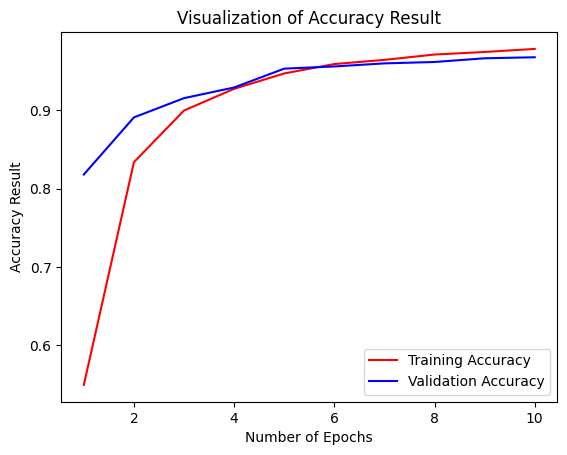

In [31]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'] , color='red' , label= 'Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'] , color='blue' , label= 'Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

Some other metrics for model evaluation

In [32]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [33]:
# Using validation_set that is valid folder as an test_set
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical", # since we are dealing with multiclass problem
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [34]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape 
# y_pred.shape is 17572,38 that is for each 17572 images model is giving 38 probabilites. Our task is to select the maximum probability class. 

550/550 ━━━━━━━━━━━━━━━━━━━━ 77s 139ms/step


(array([[9.97874379e-01, 2.09752889e-03, 3.52057469e-07, ...,
         1.12929388e-11, 2.42254150e-09, 8.92688368e-10],
        [9.38542962e-01, 6.04881682e-02, 7.49436310e-07, ...,
         6.20737406e-10, 4.12831071e-07, 1.44811985e-08],
        [9.99999881e-01, 6.68117224e-08, 5.24631782e-10, ...,
         1.38404151e-16, 2.27326160e-13, 3.77544702e-13],
        ...,
        [1.62463066e-12, 1.39536711e-13, 3.70741798e-10, ...,
         1.20906459e-13, 9.11018982e-13, 9.99999881e-01],
        [2.35676201e-10, 3.83956495e-12, 6.45271392e-09, ...,
         9.47324597e-12, 3.83595135e-11, 9.99999642e-01],
        [2.14855681e-17, 6.47623773e-18, 3.82099474e-16, ...,
         5.61134254e-20, 2.13457173e-16, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [35]:
predicted_categories = tf.argmax(y_pred, axis = 1) # axis = 1 means column-wise
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [36]:
true_categories = tf.concat([y for x,y in test_set] , axis = 0) # axis = 0 means row-wise
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [37]:
Y_true = tf.argmax(true_categories, axis = 1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.90      0.94       504
                                 Apple___Black_rot       0.95      0.99      0.97       497
                          Apple___Cedar_apple_rust       0.97      0.95      0.96       440
                                   Apple___healthy       0.95      0.97      0.96       502
                               Blueberry___healthy       0.98      0.97      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.95      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.93      0.

In [48]:
cm = confusion_matrix(Y_true, predicted_categories)
cm


array([[452,  20,   1, ...,   0,   0,   0],
       [  0, 494,   0, ...,   0,   0,   0],
       [  0,   0, 420, ...,   1,   0,   0],
       ...,
       [  0,   0,   0, ..., 486,   0,   0],
       [  0,   0,   0, ...,   0, 447,   0],
       [  0,   0,   1, ...,   0,   0, 479]])

In [49]:
cm.shape

(38, 38)

Confusion Matrix Visualization

<Axes: >

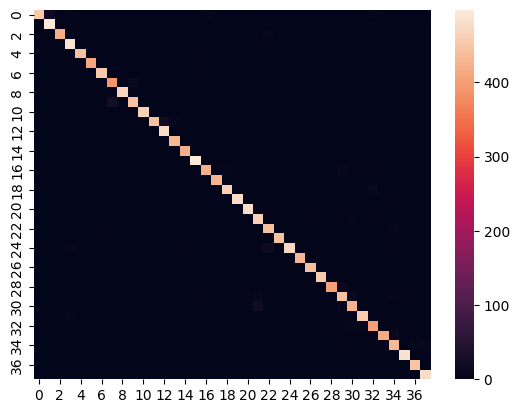

In [50]:
sns.heatmap(cm)

<function matplotlib.pyplot.show(close=None, block=None)>

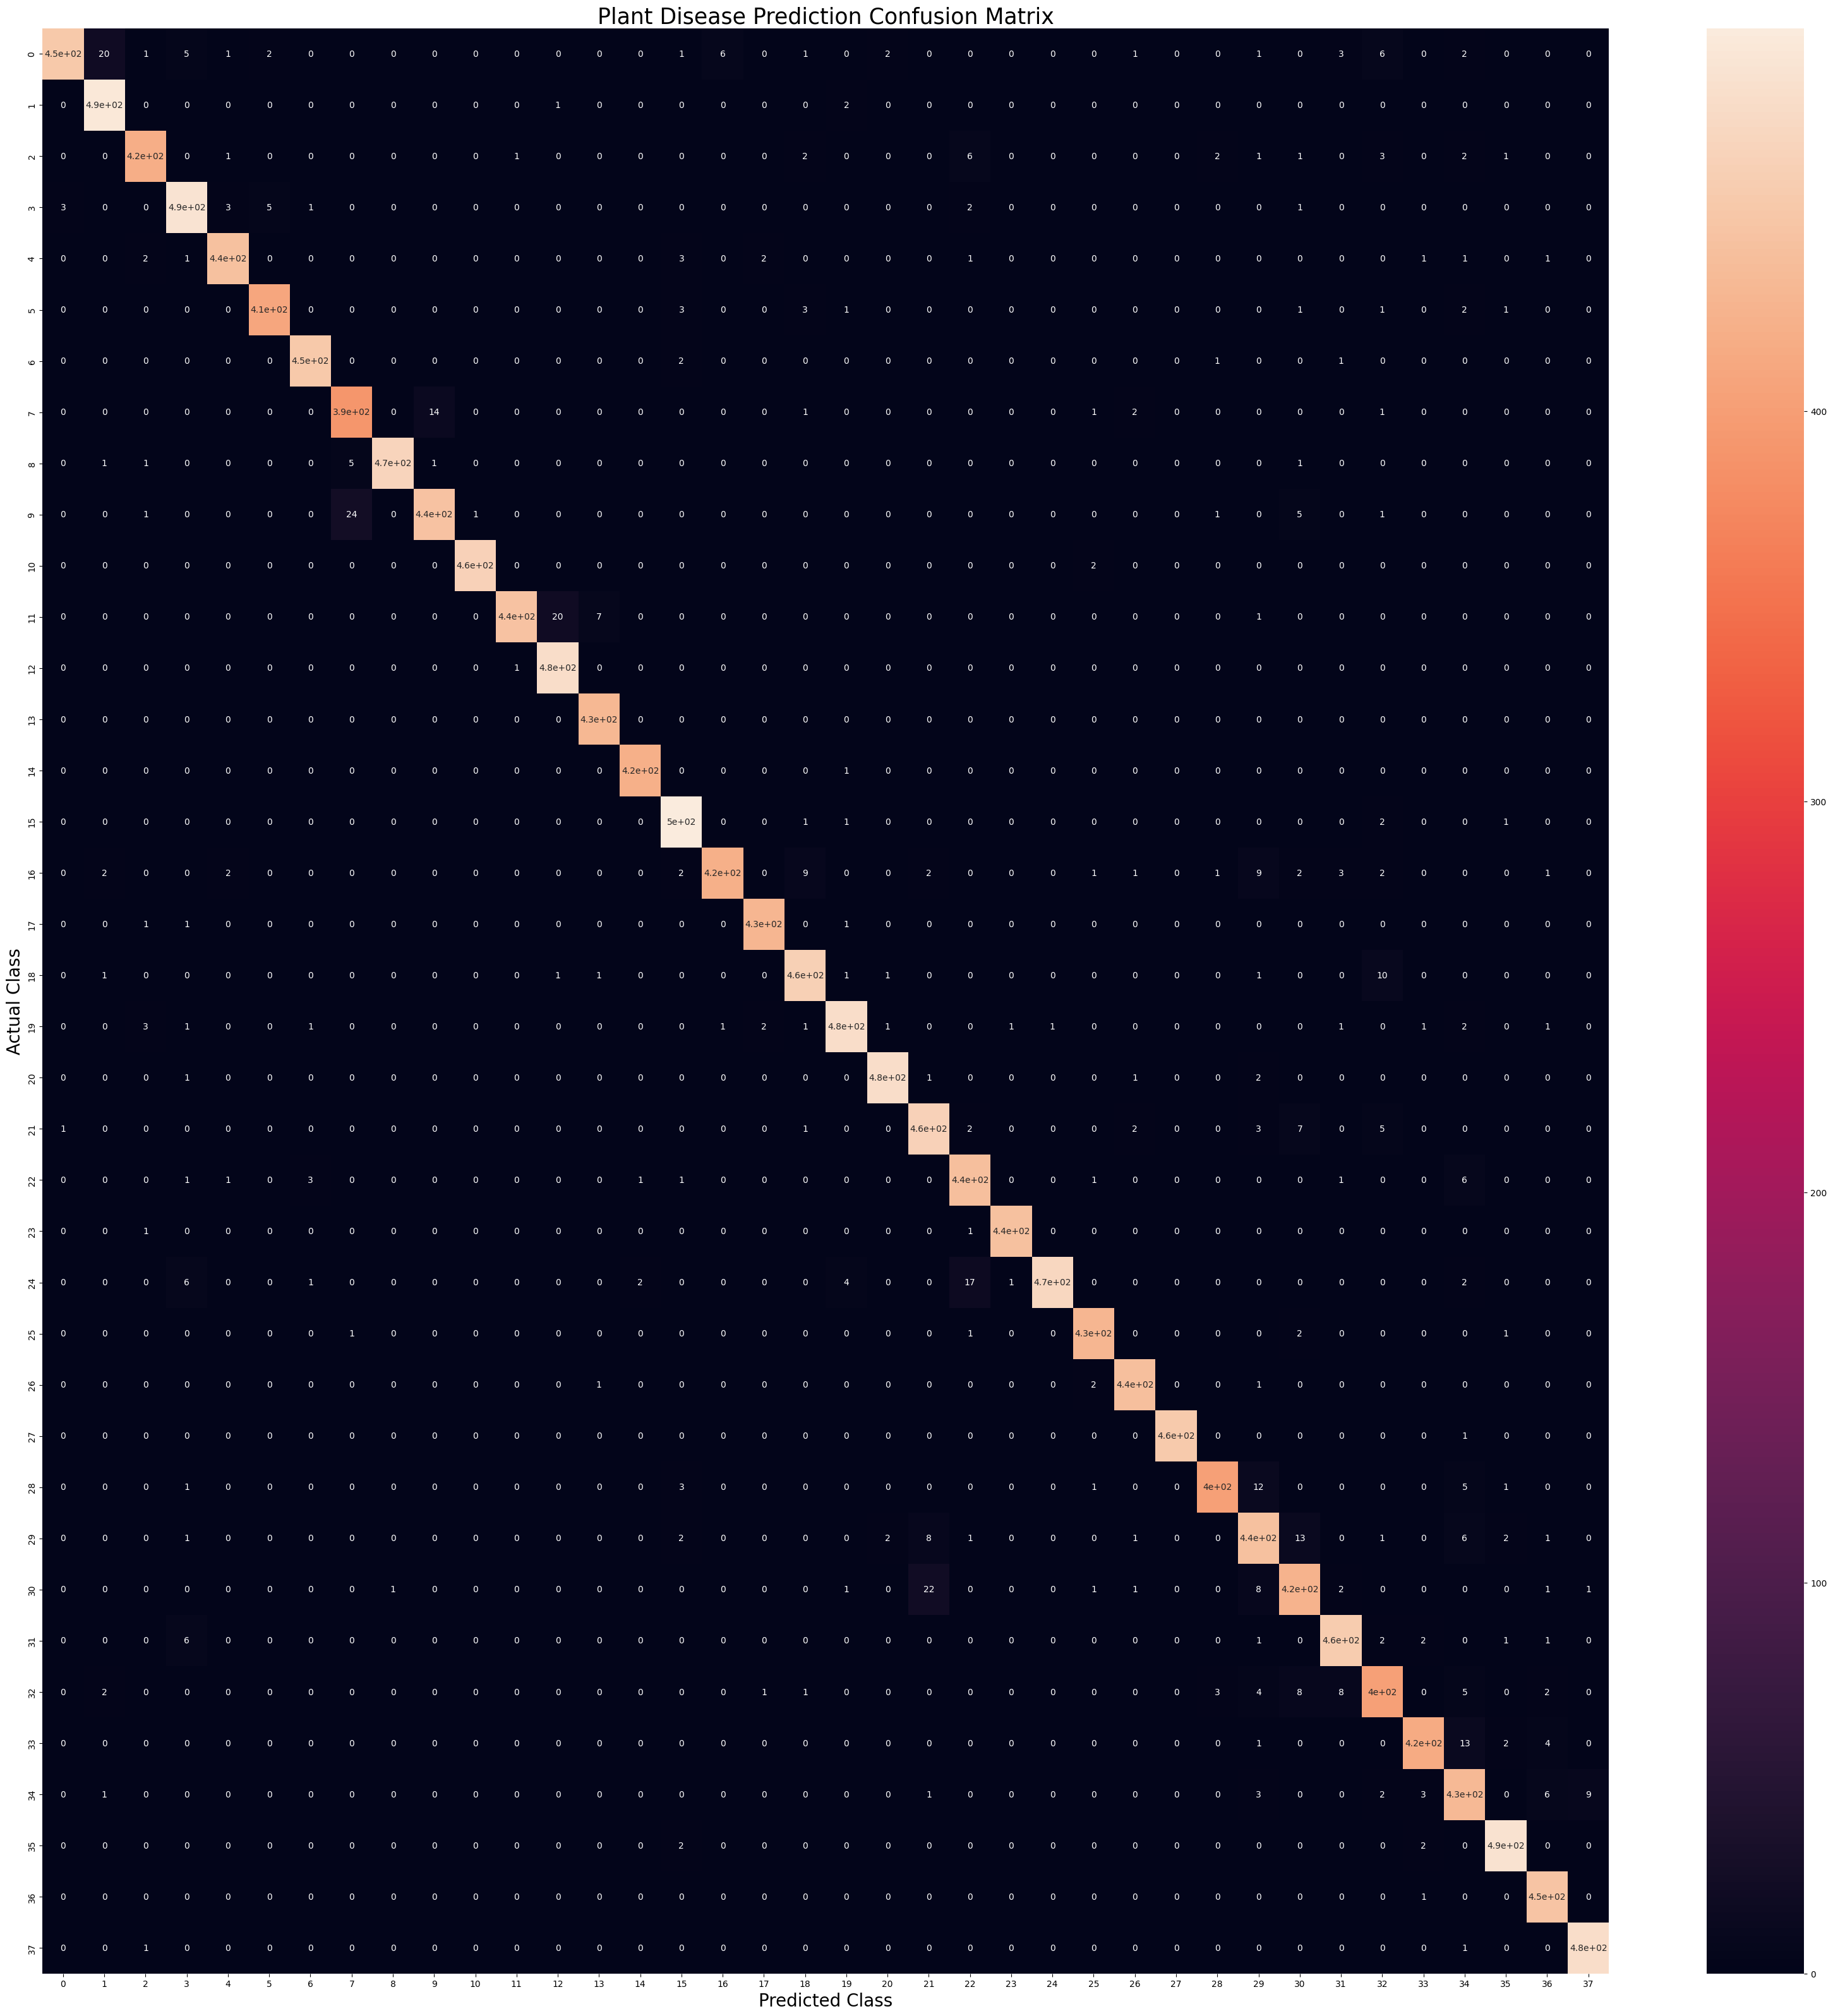

In [56]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, annot_kws= {'size' : 10})
plt.xlabel("Predicted Class" , fontsize = 20)
plt.ylabel("Actual Class" , fontsize = 20)
plt.title("Plant Disease Prediction Confusion Matrix" , fontsize = 25)
plt.show